# Loading of Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

## Data Loading into a df

In [2]:
df=pd.read_csv('listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


### Data info

# df.info()

Presently, our focus shifts towards determining the extent of the dataset's dimensions — both 
#in terms of rows and columns. Equally important is the exploration of the uniqueness within 
#each column's values. To facilitate this, we will employ the "nunique" function.


In [3]:
print('\nRows : ',df.shape[0])
print('\nColumns :', df.shape[1])
print('\nColumns:',df.columns.to_list())
print(' \nUnique:\n',df.nunique())



Rows :  7608

Columns : 18

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
 
Unique:
 id                                7608
name                              3585
host_id                           6571
host_name                         3031
neighbourhood_group                  0
neighbourhood                       22
latitude                          5196
longitude                         6137
room_type                            4
price                              626
minimum_nights                      48
number_of_reviews                  478
last_review                        977
reviews_per_month                  637
calculated_host_listings_count      17
availability_365                   366
number_of_reviews_ltm              1

#Thus, our dataset comprises a total of 7608 rows alongside 18 columns.

#We notice that there is an entire column that does not have any values, 
#which means we have to delete it from the data.

In [4]:
df = df.drop(columns=['neighbourhood_group']) 
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


In [5]:
print('\nRows : ',df.shape[0])
print('\nColumns :', df.shape[1])
print('\nColumns:',df.columns.to_list())
print(' \nUnique:\n',df.nunique())


Rows :  7608

Columns : 17

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
 
Unique:
 id                                7608
name                              3585
host_id                           6571
host_name                         3031
neighbourhood                       22
latitude                          5196
longitude                         6137
room_type                            4
price                              626
minimum_nights                      48
number_of_reviews                  478
last_review                        977
reviews_per_month                  637
calculated_host_listings_count      17
availability_365                   366
number_of_reviews_ltm              145
license                           5737
dtype: int64


# EDA

#It is very important to understand and analyze the Unique values, this gives a lot of insight to the data and the user preference for a particular choice.
We will take Room Type and Neighbourhood.
From the below, we have 4 types of room in the dataset and 22 different neighbourhood.

In [6]:
print('Unique value for room_type are :',df.room_type.unique())
print('Unique value for neighbourhood_group are :',df.neighbourhood.unique())

Unique value for room_type are : ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']
Unique value for neighbourhood_group are : ['Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost'
 'De Pijp - Rivierenbuurt' 'Oud-Oost' 'Centrum-West'
 'De Baarsjes - Oud-West' 'Zuid' 'Bos en Lommer' 'Slotervaart'
 'Noord-Oost' 'Westerpark' 'Watergraafsmeer' 'Buitenveldert - Zuidas'
 'Oud-Noord' 'Bijlmer-Centrum' 'IJburg - Zeeburgereiland' 'Noord-West'
 'Geuzenveld - Slotermeer' 'De Aker - Nieuw Sloten' 'Osdorp'
 'Gaasperdam - Driemond' 'Bijlmer-Oost']


------------------------------------------------------------------------------------
Room Types and Neighbourhood:

We will first check the distribution of the room type by grouping the data. 
From the below its clear the Apartment is more than  and Private data is more than that of Hotel room ,shared rooms.
In general, Shared rooms and Hotel room  costs less and can be very useful for travellers who moves from one city to another city quite frequently. 
Though the shared rooms and Hotel room data is less, we will still try to uncover as much details as we can.



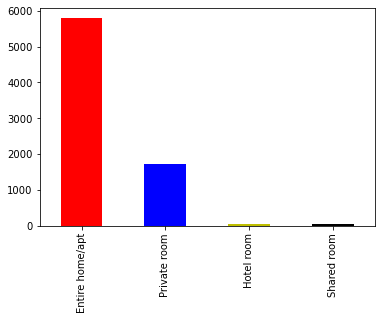

In [7]:
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y','black'])
plt.show()

----------------------------------------------------------------------
Top 10 Apartment listings:

In [8]:
apt = df[df['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood','room_type']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_id,host_name,neighbourhood,room_type,apartment
5064,364305280,Arnold,De Pijp - Rivierenbuurt,Entire home/apt,14
4828,241644101,Wittenberg,Centrum-Oost,Entire home/apt,14
846,5796250,Remco,Centrum-West,Entire home/apt,11
1345,9282300,Dutch Masters,Centrum-Oost,Entire home/apt,9
5080,375961673,Cityden,Bos en Lommer,Entire home/apt,9
5421,497874880,James,Centrum-West,Entire home/apt,8
4415,135487531,Rogier & Nicole,Noord-West,Entire home/apt,7
2787,30890942,Zoku Amsterdam,Centrum-Oost,Entire home/apt,6
5412,495838645,Mario,Centrum-West,Entire home/apt,6
3301,46691672,Eva & Kobe,Oud-Noord,Entire home/apt,6


---------------------------------------------------------------------------------
Lets see Arnold data.

Seeing the below latitude and longitude it is clear that it is in the same building.

In [9]:
Arnold_data = df[df['host_name']=='Arnold']
Arnold_data_by = Arnold_data[['host_id','host_name','neighbourhood','latitude','longitude']]
Arnold_data_by.head(5)

,host_id,host_name,neighbourhood,latitude,longitude
4347,364305280,Arnold,Centrum-Oost,52.36375,4.897030
4349,364305280,Arnold,Centrum-Oost,52.36419,4.897050
5687,364305280,Arnold,De Pijp - Rivierenbuurt,52.34702,4.909810
5690,364305280,Arnold,De Pijp - Rivierenbuurt,52.34692,4.910101
5697,364305280,Arnold,De Pijp - Rivierenbuurt,52.34839,4.911390


------------------------------------------------------------------------------------------------------
Top 10 Private room

We will do it for both Private room and Shared room and also will check for the top hoteliers if it is the same location or it is spread out.

In [10]:
private = df[df['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood','room_type']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood,room_type,private
398,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,Private room,21
1239,488984558,Abdullah,Centrum-West,Private room,14
1045,243878598,Bunk,Oud-Noord,Private room,10
1035,237371423,Conscious Hotel Westerpark,Westerpark,Private room,9
1098,311321908,Melrose Hotel,Centrum-West,Private room,9
1143,369191693,The Hendrick'S Hotel,Centrum-Oost,Private room,8
1173,398261845,Singel,Centrum-West,Private room,8
1120,342059962,David,Geuzenveld - Slotermeer,Private room,8
1043,243118788,The Arcade Hotel,De Pijp - Rivierenbuurt,Private room,8
113,3040748,Henk,Noord-Oost,Private room,8


----------------------------------------------------------------------------------------------
Location wise Private room

In [11]:
private_data = df[df['host_name']=='Hotel Not Hotel']
private_data_by = private_data[['host_id','host_name','neighbourhood','latitude','longitude']]
private_data_by.head()

,host_id,host_name,neighbourhood,latitude,longitude
444,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36491,4.86102
451,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36714,4.86019
481,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36623,4.85891
483,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36689,4.85891
486,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36568,4.85883


--------------------------------------------------------------------------------------
Shared Room Exploration

In [12]:
private = df[df['room_type']=='Shared room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood,shared
11,245267147,ClinkNOORD,Oud-Noord,8
7,198405490,Suzanne,Centrum-West,4
12,251479377,Generator,Oud-Oost,4
9,237150996,St Christophers At The Winston,Centrum-West,4
16,372015241,Ecomama,Centrum-Oost,3
14,308694260,Dutchies Hostel,Bos en Lommer,3
10,243878598,Bunk,Oud-Noord,2
20,483286831,Marrit,Centrum-Oost,2
8,198405490,Suzanne,De Baarsjes - Oud-West,1
6,101856083,Unsal,Centrum-Oost,1


-------------------------------------------------------------------------
Hotel room Exploration

In [13]:
private = df[df['room_type']=='Hotel room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='Hotel room').sort_values(by=['Hotel room'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood,Hotel room
28,503491020,Rosalie,Oud-Oost,5
4,5137582,C.T.,Gaasperdam - Driemond,4
22,245267147,ClinkNOORD,Oud-Noord,4
21,244695471,Heye 130,De Baarsjes - Oud-West,4
18,237150727,The Flying Pig Uptown,Zuid,3
14,203731852,Sweets,Centrum-Oost,3
1,3278419,Matthijs,Centrum-West,2
3,4615590,Marta,Noord-West,2
27,373013820,Sircle,Centrum-West,2
17,237150404,The Flying Pig Downtown,Centrum-West,2


----------------------------------------------------------------------------------------------
#Exploration of Neighbourhood


Let's explore the neighbourhood now to see the data distribution.
From the below it looks like De Baarsjes - Oud-West , Centrum-West,De Pijp - Rivierenbuurt and Centrum-Oost has more number of listing.
Recommendations: The company can increase advertisements in these areas to increase its own profits and make special projects for it.

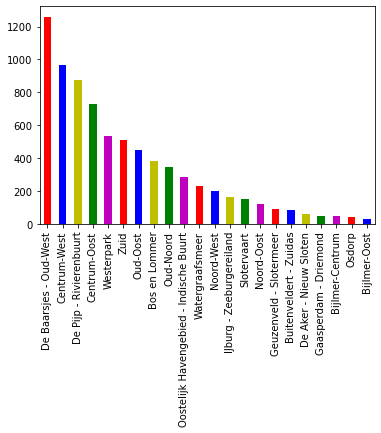

In [14]:
df['neighbourhood'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()

In [15]:
private = df[df['neighbourhood']=='De Baarsjes - Oud-West']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood,count
388,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,21
1045,273266448,Vlad,De Baarsjes - Oud-West,9
1110,428344496,Catalonia Vondel Amsterdam,De Baarsjes - Oud-West,8
1024,244695471,Heye 130,De Baarsjes - Oud-West,6
929,128826790,Natasja & Mylan,De Baarsjes - Oud-West,4
104,3548522,Susanne,De Baarsjes - Oud-West,3
1015,225780606,Stef,De Baarsjes - Oud-West,3
706,48158577,Eva,De Baarsjes - Oud-West,3
15,613779,Silvana,De Baarsjes - Oud-West,3
1000,203731852,Sweets,De Baarsjes - Oud-West,3


------------------------------------------------------------------------------------
Price Exploration


We will check if there is any null value presentin the price column and from the below,
it looks like we don't have any null value to take care of.

In [16]:
df.price.isna().sum()

0

----------------------------------------------------------------------------------------------
Let's have a quick summary of the price data.

In according to the summary statistics it is clear that the Price ranges from  0−300. 
But there also exists price which has a maximum of $12000.
This we cannot discard as an outlier because there are many scenarios in which price differs.
The price varies on different factors which includes location,room type, neighbourhood , season etc.
Also, we can see from the below there are few few values with 0, 
which can be due to dynamic pricing or the willingness of not to share the price with the Airbnb.


In [17]:
df['price'].describe()

count     7608.000000
mean       251.065589
std        263.170218
min          0.000000
25%        148.000000
50%        202.000000
75%        300.000000
max      12000.000000
Name: price, dtype: float64

------------------------------------------------------------------------------------------------
We also plot a boxplot to understand how the data is spread out for high ranges for the price irrespective of region.


<AxesSubplot:xlabel='price'>

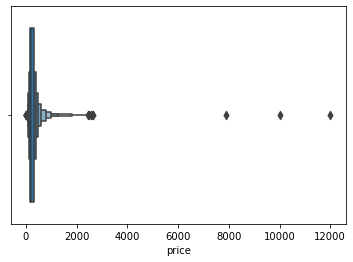

In [18]:
figsize=(12,8)
sns.boxenplot(x='price',data=df)

-----------------------------------------------------------------------------------

For any traveller, the most important thing is the price since this sets the budget of his/her trip.
So in the below we will figure out what is the average price per night. 
We will check for different room type and based on neighbourhood to figure out what is the average per night stay. 
Staying at a shared room in Oostelijk Havengebied - Indische Buurt is always an expensive stay than Entire home/apt/private rooms for any location. This is so because Entire room is rented out by family for nice stay where privacy is also one of the major factor. Whereas Stay at Shared rooms are being preferred by travellers who generally don't wish to stay for long time at a particular place and moves around places quickly.

So looking at the plot it is clear :

Shared room at Oostelijk Havengebied - Indische Buurt is always an most expensive stay per night 
     whereas Renting a Shared room at De Aker - Nieuw Sloten per night is the most cheapest stay .


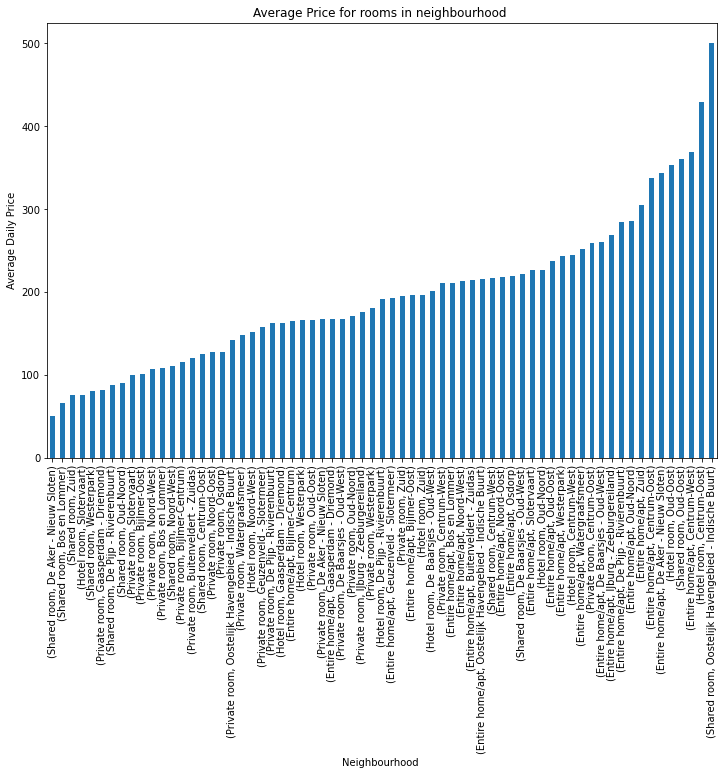

List of Average Price per night based on the neighbourhood 


price
room_type       neighbourhood                                     
Entire home/apt De Baarsjes - Oud-West                  260.563860
                Bijlmer-Centrum                         164.730769
                Geuzenveld - Slotermeer                 193.031746
                Bijlmer-Oost                            195.941176
                Bos en Lommer                           211.000000
...                                                            ...
Shared room     Westerpark                               80.000000
                Zuid                                     75.000000
                Bos en Lommer                            65.666667
                De Baarsjes - Oud-West                  221.500000
                Oostelijk Havengebied - Indische Buurt  500.000000

[67 rows x 1 columns]

In [20]:
df.head()
plt.figure(figsize=(12,8))
df0= df[df['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood ')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood ')
plt.show()
print('List of Average Price per night based on the neighbourhood ')
pd.DataFrame(df1).sort_values(by='room_type')


Expensive Neighbourhood

Till so far we have checked on the location group, but we have not came across each neighbourhood. 
This is very much important in terms of price to understand which locality has the highest price margin in terms of night being spend by traveller.
Let's dig further to understand further.
So we will now plot the most expensive neighbourhood, and we will plot only Top 10 neighbourhood and Bottom 15 with respect to average price. This will help a traveller to choose the appropriate neighbourhood based on his budget.

----------------Results------------------------------------------------

So according to the below plot Centrum-Oost and Centrum-West are the most expensive in terms of neighbourhood.
 Gaasperdam - Driemond is a least expensive in terms of neighbourhood.
------------------------------------------------------------------------------------------


 Arrangement locality in Airbnb listing are : :


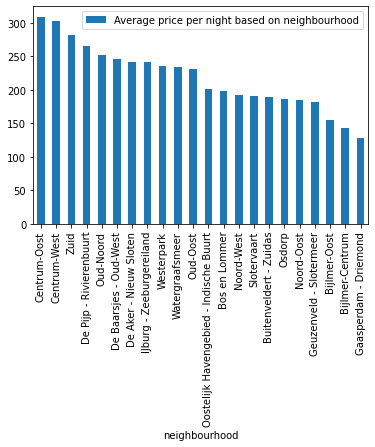

,Average price per night based on neighbourhood
neighbourhood,
Centrum-Oost,308.900000
Centrum-West,303.006192
Zuid,281.211765
De Pijp - Rivierenbuurt,265.912844
Oud-Noord,252.130058
De Baarsjes - Oud-West,245.950000
De Aker - Nieuw Sloten,241.758065
IJburg - Zeeburgereiland,241.164634
Westerpark,234.792910


In [21]:
print(' Arrangement locality in Airbnb listing are : :')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(22)
df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

Most number of locality listed

We will now try to figure out how many number of neighbourhood has been posted based on the count.
We can see De Baarsjes - Oud-West has most number of listing count where as Bijlmer-Oost has one of the least listing.


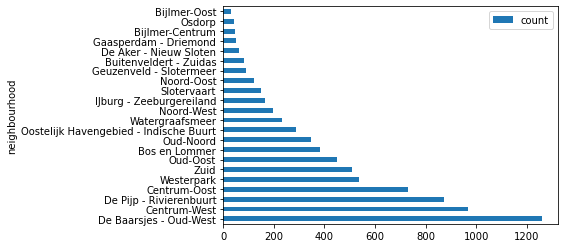

,count
neighbourhood,
De Baarsjes - Oud-West,1260
Centrum-West,969
De Pijp - Rivierenbuurt,872
Centrum-Oost,730
Westerpark,536
Zuid,510
Oud-Oost,451
Bos en Lommer,382
Oud-Noord,346


In [22]:
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count'])['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})
df5.head(22).plot(kind='barh')
plt.show()
pd.DataFrame(df5.head(22))

-------------------------------------------------------------------------------------------------

Locations and Reviews :

Reviews play a vital role in today's online landscape.
They offer valuable perspectives on specific destinations for travelers, significantly influencing their decisions when booking online.
A budget-friendly location with unfavorable reviews might dissuade a traveler from making a reservation, while a pricier location with glowing reviews could prompt a traveler to spend more than initially planned.
Thus, we aim to assess the reviews and understand how each neighborhood is perceived. 
Given the limited review data, our goal is to extract insights to the fullest extent possible.
So according to the below plot, De Baarsjes - Oud-West got most review. Also Bijlmer-Oost which is cheaper has less review than the other neighbourhood group. 
We cannot proceed further to understand why is that case since we have a limited data.

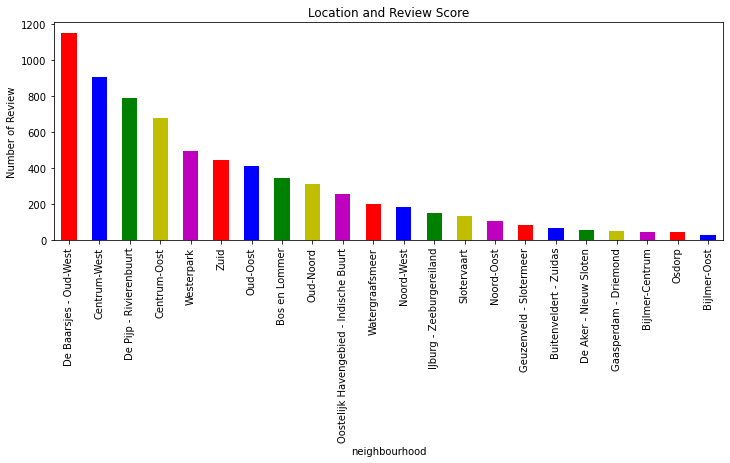

 Count of Review v/s neighbourhood


,neighbourhood
De Baarsjes - Oud-West,1150
Centrum-West,902
De Pijp - Rivierenbuurt,790
Centrum-Oost,676
Westerpark,494
Zuid,444
Oud-Oost,410
Bos en Lommer,341
Oud-Noord,310
Oostelijk Havengebied - Indische Buurt,253


In [23]:
fig = plt.figure(figsize=(12,4))
review = df[df['number_of_reviews']>=1]
df2 = review['neighbourhood'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score')
plt.ylabel('Number of Review')
plt.xlabel('neighbourhood')
plt.show()
print(' Count of Review v/s neighbourhood')
pd.DataFrame(df2)

------------------------------------------------------------------------------------------------

Top 10 host:

Based on the review score we will plot, who is our top 10 Host, this increases the confidence of tourist before booking.
Also lets plot based on the lattitude and location of our review data.
Below plot shows the Top 10 host and it looks like Maarten has received more reviews for topping the chart 


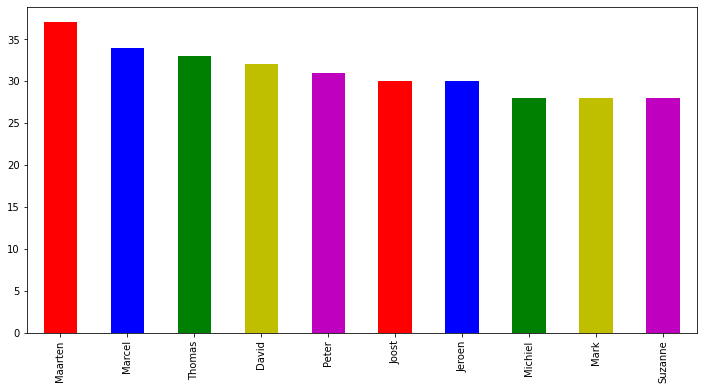

In [24]:
plt.figure(figsize=(12,6))
review.head(2)
df1 = review['host_name'].value_counts()[:10].plot(kind='bar',color=['r','b','g','y','m'])

----------------------------------------------------------------------------------------

Plot Price based on the Availability 365:

We will plot a scatterplot to understand if there is any price increase based on the availability and looking below the plot its hardly to infer.
But looks like with availability with 365 the price increases to 12K.

<AxesSubplot:xlabel='availability_365', ylabel='price'>

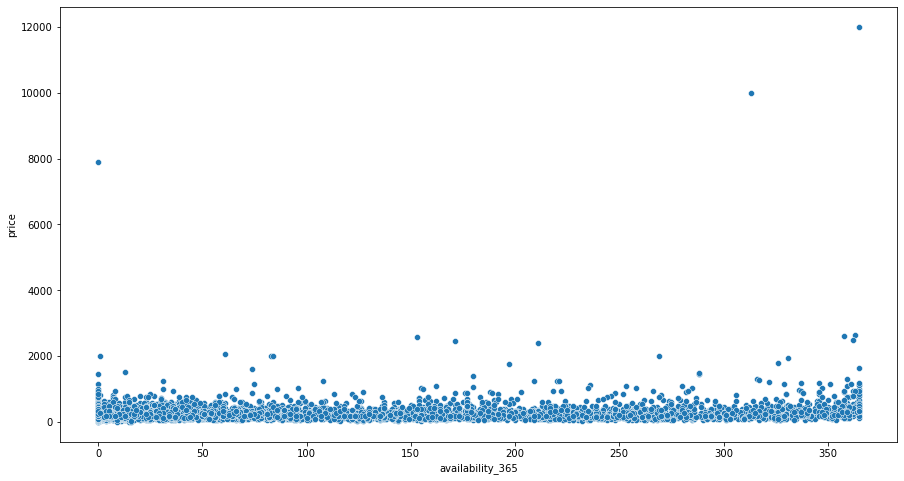

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['price'],x=df['availability_365'])

--------------------------------------------------------------------------------------------
Average Listing for each Neighbourhood:

Knowing the average listings for each neighborhood (or geographic group) gives you a general idea
 about the distribution of listings and accommodations across different neighborhoods or areas.
 This information can have several benefits:

1-Identifying Crowding and Demand: The average listings can help you understand which neighborhoods have the highest number of listings and therefore are more crowded in terms of demand.This can assist in making informed decisions about whether you want to invest in those areas or look for accommodations there.

2-Identifying Key Areas: By knowing which neighborhoods have the highest number of listings,
           #you can pinpoint key areas that might offer the best options for accommodations or investment.

3-Evaluating Price Distribution: In addition to the number of listings, you can review the price distribution of listings in each neighborhood.
This can help you understand the average prices of accommodations in each area and choose the most suitable option for your budget.

4-Market Trends: Knowing the average listings can help identify market trends and the preference of tourists or renters for certain neighborhoods compared to others.

Overall, knowing the average listings for each neighborhood can assist you in making more informed decisions when searching for accommodations or considering real estate investment.


In [26]:
df6 = review.groupby(['neighbourhood','room_type']).mean()
df6 = df6.drop(['id','calculated_host_listings_count','reviews_per_month'],axis=1)
pd.DataFrame(df6).sort_values('neighbourhood')

host_id   latitude  longitude  \
neighbourhood   room_type                                             
Bijlmer-Centrum Entire home/apt  1.278268e+08  52.318071   4.949390   
                Private room     1.406282e+08  52.319375   4.951156   
Bijlmer-Oost    Entire home/apt  9.770773e+07  52.322215   4.978061   
                Private room     9.831574e+07  52.320183   4.981246   
Bos en Lommer   Entire home/apt  8.971869e+07  52.378432   4.851728   
...                                       ...        ...        ...   
Westerpark      Private room     1.010500e+08  52.384662   4.877377   
Zuid            Hotel room       1.510949e+08  52.355976   4.873086   
                Private room     1.435233e+08  52.352694   4.865867   
                Entire home/apt  7.402644e+07  52.351526   4.862273   
                Shared room      2.565704e+07  52.346090   4.848720   

                                      price  minimum_nights  \
neighbourhood   room_type                                     
Bijlmer-Centrum Entire home/apt  165.320000        3.000000   
                Private room     119.000000        2.368421   
Bijlmer-Oost    Entire home/apt  194.400000        3.666667   
                Private room     100.307692        2.307692   
Bos en Lommer   Entire home/apt  210.620000        6.810000   
...                                     ...             ...   
Westerpark      Private room     184.100000        1.900000   
Zuid            Hotel room       196.285714        1.571429   
                Private room     186.031915        2.010638   
                Entire home/apt  286.248538        3.894737   
                Shared room       75.000000        1.000000   

                                 number_of_reviews  availability_365  \
neighbourhood   room_type                                              
Bijlmer-Centrum Entire home/apt          32.920000         46.640000   
                Private room            131.315789         76.526316   
Bijlmer-Oost    Entire home/apt           7.200000         83.000000   
                Private room             54.307692         62.153846   
Bos en Lommer   Entire home/apt          19.660000         46.630000   
...                                            ...               ...   
Westerpark      Private room            129.242857        163.028571   
Zuid            Hotel room               87.000000         94.000000   
                Private room            119.446809        117.127660   
                Entire home/apt          27.692982         75.473684   
                Shared room              65.000000          0.000000   

                                 number_of_reviews_ltm  
neighbourhood   room_type                               
Bijlmer-Centrum Entire home/apt               7.960000  
                Private room                 48.789474  
Bijlmer-Oost    Entire home/apt               4.066667  
                Private room                 12.461538  
Bos en Lommer   Entire home/apt               5.100000  
...                                                ...  
Westerpark      Private room                 25.628571  
Zuid            Hotel room                   16.142857  
                Private room                 29.255319  
                Entire home/apt               5.383041  
                Shared room                   0.000000  

[66 rows x 8 columns]

Recommendations:
- Review the neighborhoods that received few reviews and what are their reasons.
- Making projects and marketing advertisements for projects through which the company can make money in the most crowded and most booked places.
- Make rewards for the hosts in the event of a good review and in the case of a bad review, it will be verified with him in this regard.